## Ex. 1

In [8]:
data <- c(26.8, 26.3, 28.3, 28.5, 16.3, 31.9, 28.5, 27.2, 
          20.9, 27.5, 28.0, 18.6, 22.3, 25.0, 31.5)

y <- mean(data)
sig <- 4
n <- length(data)

m <- 20
s <- 5

M <- (1/(n/sig^2+1/s^2))*( m/s^2 + n*y/sig^2 )
S <- sig^2*s^2/(sig^2+n*s^2)

In [9]:
M
sqrt(S)
M - qnorm(0.975)*sqrt(S)
M + qnorm(0.975)*sqrt(S)

[1] 25.60102

[1] 1.011443

[1] 23.61863

[1] 27.58342

In [10]:
m <- 30
s <- 4

M <- (1/(n/sig^2+1/s^2))*( m/s^2 + n*y/sig^2 )
S <- sig^2*s^2/(sig^2+n*s^2)

In [11]:
M
sqrt(S)
M - qnorm(0.975)*sqrt(S)
M + qnorm(0.975)*sqrt(S)

[1] 26.1

[1] 1

[1] 24.14004

[1] 28.05996

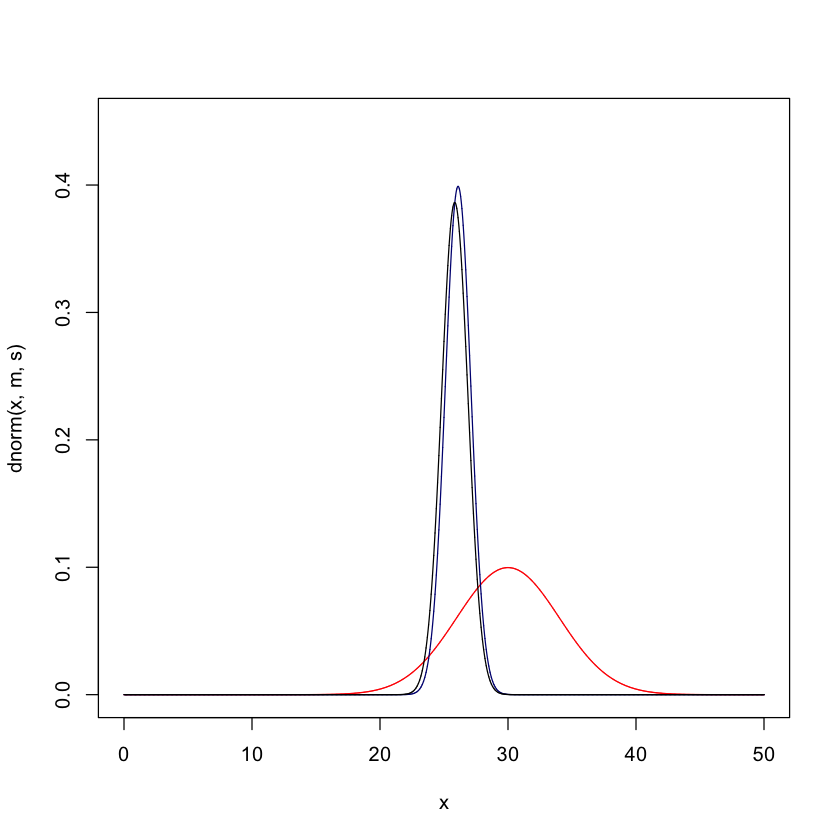

In [26]:
x <- seq(0, 50, 0.001)
plot(x, dnorm(x, m, s), col = "red", type='l', ylim=c(0, 0.45))
lines(x, dnorm(x, M, S), col = "navy")
# lines(x, dnorm(x, M, S)/dnorm(x, m, s)/(0.001*sum(dnorm(x, M, S)/dnorm(x, m, s))))
lines(x, dnorm(x, y, s/sqrt(n)))

## Ex. 2

In [35]:
n <- 16
sig <- 2

obs <- c(4.09, 4.68, 1.87, 2.62, 5.58, 8.68, 4.07, 4.78, 
         4.79, 4.49, 5.85, 5.09, 2.40, 6.27, 6.30, 4.47)
y <- round(mean(obs), 2)

In [32]:
prior <- function(x) {
    ifelse (x<0, 0, 
            ifelse(0<x & x<=3, x, 
                   ifelse(3<x & x<=5, 3,
                         ifelse(5<x & x<=8, 8-x, 0))))
}

In [36]:
likelihood <- function(x) {
    dnorm(x, y, sig/sqrt(n))
}

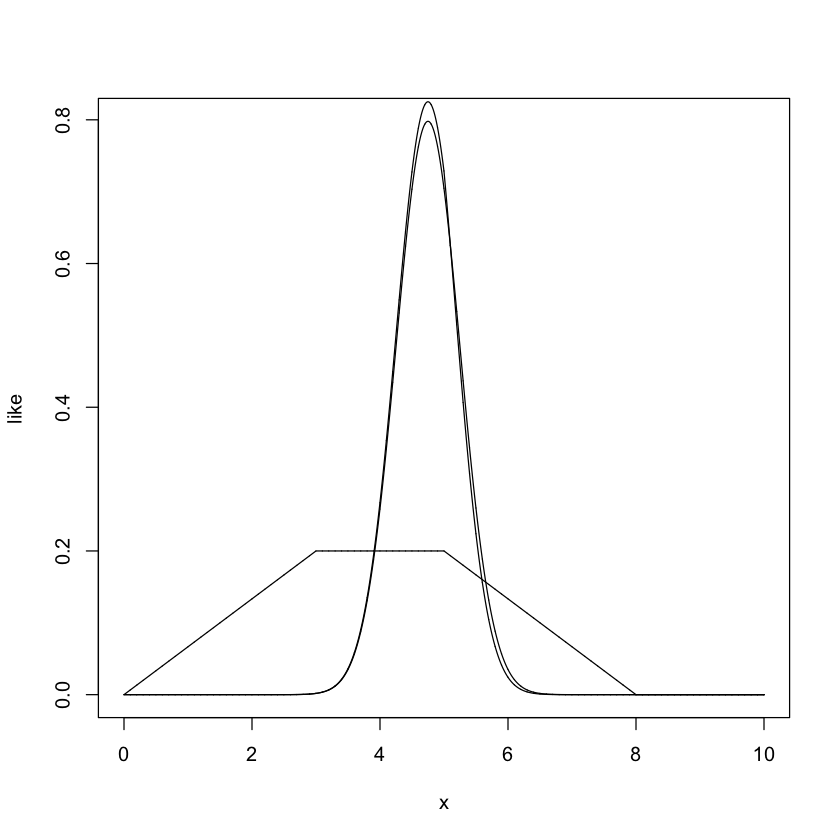

In [88]:
x <- seq(0, 10, 0.001)

pr <- prior(x)
ps <- prior(x)*likelihood(x)
ps.norm <- ps/(sum(ps)*0.001)
like <- likelihood(x)


plot(x, like, type='l')
lines(x, pr/sum(pr)/0.001)
lines(x, ps.norm)

In [93]:
sum(x*ps.norm*0.001)

sum(x^2*ps.norm*0.001) - sum(x*ps.norm*0.001)^2

[1] 4.723432

[1] 0.2340869